Matematički softver
===================

## Sadržaj kolegija

- Python
- Numpy / Scipy
- Pandas
- Sympy
- Sage
- Markdown
- $\LaTeX$

Kolegij će se bazirati na korištenju web platforme [Sagemath cloud](http://cloud.sagemath.com). 
Materijali za kolegij se nalaze na web stranici [kolegija](http://web.math.pmf.unizg.hr/nastava/matsoft), na Sagemath oblaku te u [Git repozitoriju kolegija](https://github.com/inakic/matsoft).

## Plan kolegija

1. Uvod u Python; upoznavanje s web platformom
2. Markdown, $\LaTeX$ notacija za matematičke formule
3. Python kao alat za znanstvenike (Matplotlib, Pandas, ...)
4. Sage
5. $\LaTeX$

## Polaganje kolegija
Ocjena se formira na osnovu dva kolokvija te domaćih zadaća.

**Kolokviji** open-book tipa. 

Kolokviji nose najviše 80 bodova.

**Domaće zadaće** u obliku eseja, sa zadanim elementima. 

Predaja ispravno napravljenih svih domaćih zadaća nužan je uvjet za polaganje kolegija. Domaća zadaća je uspješno predana samo ako ima **sve** tražene elemente. 

Domaće zadaće nose do 20 bodova, ali na sljedeći način: studenti čije domaće zadaće odskaču kvalitetom dobit će do 20 dodatnih bodova.

**Popravni ispit** nije predviđen.

## Literatura

**GIYF**

Kolegij se dosta oslanja na [Lectures on scientific computing with Python](https://github.com/jrjohansson/scientific-python-lectures).

## Python

### Prvi primjeri, korištenje Jupyter (IPython) notebook-a


Jupyter notebook ima puno mogućnosti, koje ćemo upoznavati tijekom kolegija. Jedna od njih je i jednostavan pristup datotečnom sustavu.

In [4]:
ls

custom.css        lena.png     mojmodul.pyc   thumb2.png  Uvod.ipynb
integral_demo.py  mojmodul.py  terminal.term  thumb.png   Uvod.slides.html


In [4]:
pwd

u'/projects/95cb524c-f1ac-4a19-908e-5f47c10f47c1/01. Uvod; Python'

In [83]:
%matplotlib inline
%load integral_demo.py

In [1]:
from pylab import *
from matplotlib.patches import Polygon
def func(x):
    return (x-3)*(x-5)*(x-7)+85
def integral_plot(f):
    ax = subplot(111)
    a, b = 2, 9 # integral area
    x = arange(0, 10, 0.01)
    y = f(x)
    plot(x, y, linewidth=1)
    # make the shaded region
    ix = arange(a, b, 0.01)
    iy = func(ix)
    verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
    poly = Polygon(verts, facecolor='0.8', edgecolor='k')
    ax.add_patch(poly)
    text(0.5 * (a + b), 30,
         r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
         fontsize=20)
    axis([0,10, 0, 180])
    figtext(0.9, 0.05, 'x')
    figtext(0.1, 0.9, 'y')
    ax.set_xticks((a,b))
    ax.set_xticklabels((r'$a$',r'$b$'))
    ax.set_yticks([])
    show ()

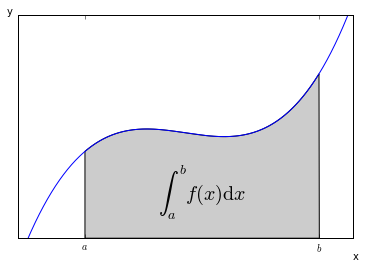

In [2]:
integral_plot(func)

In [3]:
from IPython.display import Image
Image(url='http://python.org/images/python-logo.gif')

In [15]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="//www.youtube.com/embed/-SqzarfTqRY" frameborder="0" allowfullscreen></iframe>') 

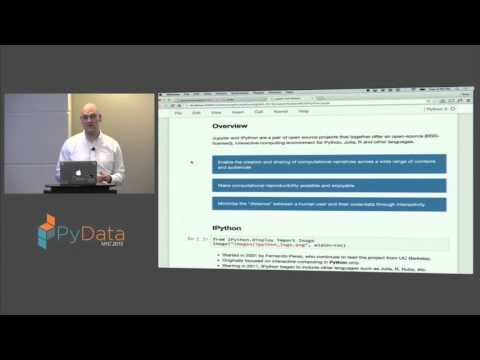

In [19]:
from IPython.display import YouTubeVideo
from IPython.display import display
display(YouTubeVideo("GMKZD1Ohlzk",width="560",height="315", start=3))

Jedan [primjer korištenja Jupytera](https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html). [Verzija](https://cloud.sagemath.com/projects/4a5f0542-5873-4eed-a85c-a18c706e8bcd/files/support/2016-02-12-LIGO/GW150914_tutorial.html) sa svim pomoćnim datotekama na Sagemath oblaku.

### Primjer korištenja Pythona

Krenimo s nečim korisnim. Učitajmo sliku, prikažimo je, prikažimo dio slike te smanjimo šum na tom dijelu slike.

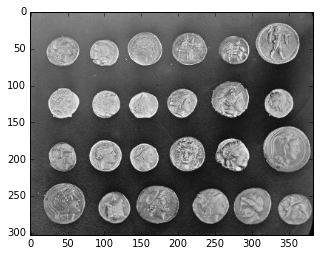

In [11]:
#Scikit-image je paket za manipulaciju slika
from skimage import data
import matplotlib.pyplot as plt
coins = data.coins()
plt.imshow(coins,cmap='gray');

Što se dešava u gornjem kodu?

Prvi redak koda služi da se iz biblioteke [scikit-image](http://scikit-image.org/) učita pod-bibiloteka *data*.

U drugom retku iz biblioteke [matplotlib](http://matplotlib.org/) učitavamo pod-biblioteku *pyplot*. Kako ćemo *pyplot* često koristiti dajemo joj kraće ime *plt*.

U trećem retku iz biblioteke *data* učitavamo objekt *coins*. To je u ovom slučaju slika novčića.

Na koncu prikazujemo sliku.

In [7]:
print(coins.shape)

(303, 384)


Varijabla *coins.shape* sadrži par brojeva.

In [8]:
a,b=coins.shape
print(a)
print(b)

303
384


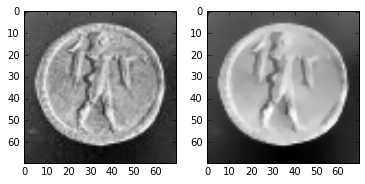

In [9]:
from skimage import restoration
coins_zoom = coins[10:80, 300:370]
tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(coins_zoom,cmap='gray'); 
plt.subplot(1,2,2)
plt.imshow(tv_coins, cmap='gray'); 

Što točno radi funkcija *denoise_tv_chambolle*? To možemo saznati na sljedeći način.

In [10]:
help(restoration.denoise_tv_chambolle)

Help on function denoise_tv_chambolle in module skimage.restoration._denoise:

denoise_tv_chambolle(im, weight=50, eps=0.0002, n_iter_max=200, multichannel=False)
    Perform total-variation denoising on 2D and 3D images.
    
    Parameters
    ----------
    im : ndarray (2d or 3d) of ints, uints or floats
        Input data to be denoised. `im` can be of any numeric type,
        but it is cast into an ndarray of floats for the computation
        of the denoised image.
    weight : float, optional
        Denoising weight. The greater `weight`, the more denoising (at
        the expense of fidelity to `input`).
    eps : float, optional
        Relative difference of the value of the cost function that
        determines the stop criterion. The algorithm stops when:
    
            (E_(n-1) - E_n) < eps * E_0
    
    n_iter_max : int, optional
        Maximal number of iterations used for the optimization.
    multichannel : bool, optional
        Apply total-variation denoising 

Analogno smo mogli koristiti i *restoration.denoise_tv_chambolle?*

Još jedan primjer korištenja biblioteka.

In [16]:
import math
print ('pi je (otprilike): {}'.format(math.pi))
print ('pi je (otprilike): {:f}'.format(math.pi))
print ('pi je (otprilike): {:1.8f}'.format(math.pi))

pi je (otprilike): 3.141592653589793
pi je (otprilike): 3.141593
pi je (otprilike): 3.14159265


In [17]:
import math as m
print ('drugi korijen iz 7 je: {}'.format(m.sqrt(7))) # umjesto math.sqrt

drugi korijen iz 7 je: 2.6457513110645907


In [19]:
from math import sqrt
print ('drugi korijen iz 9 je: {}'.format(sqrt(9))) # bez korištenja točke

drugi korijen iz 9 je: 3.0


Ukoliko želimo učitati sve iz biblioteke koristimo *.

In [20]:
from math import *
x = cos(2 * pi)
print(x)

1.0


Varijable se definiraju sa znakom za jednakost *=*. 

In [21]:
masa = 90.5
godine = 50
ime = 'Osoba #1' # može i ime = "Osoba #1"

## Brojevi

In [22]:
2/3 % U pythonu 2 rezultat bi bio 0

0.6666666666666666

In [23]:
2//3

0

In [24]:
float(2)/3

0.6666666666666666

In [25]:
8%4

0

In [26]:
5**2

25

In [27]:
# kompleksni brojevi
x = 1.0 - 1.0j
print(x.real, x.imag)

1.0 -1.0


### Razlomci

In [28]:
from fractions import Fraction
print(Fraction(6,7))
print(Fraction(2))
print(Fraction('-3/7'))
print(Fraction(2.25))

6/7
2
-3/7
9/4


## Stringovi, liste, rječnici

In [29]:
s = "Hello world"
print(len(s))
s2 = s.replace("world", "test")
print(s2)
print(s[:5])
print(s[6:])
print(s[::2])
s3 = "Hello" + "world"

11
Hello test
Hello
world
Hlowrd


In [30]:
l = [1,2,3,4]
print(l[1:3])
l2 = [1, 'a', 1.0, 1-1j]
l3 = [1, [2, [3, [4, [5]]]]]
s2=list(s2)
s2

[2, 3]


['H', 'e', 'l', 'l', 'o', ' ', 't', 'e', 's', 't']

In [31]:
l = []
l.append("A")
l.append("d")
l.append("d")
l

['A', 'd', 'd']

In [32]:
l[1]='A'
l

['A', 'A', 'd']

In [33]:
l.remove("A")
l

['A', 'd']

In [34]:
# nizovi (tuples) su isto što i liste, ali ne mogu se mijenjati
point = (10, 20)
point[0] = 20

TypeError: 'tuple' object does not support item assignment

In [35]:
# rječnici
params = {"parametar1" : 1.0,
          "parametar2" : 2.0,
          "parametar3" : 3.0,}
print("parametar2 = " + str(params["parametar2"]))

parametar2 = 2.0


## Skupovi

In [36]:
korpa = ['jabuka', 'malina', 'jabuka', 'kupina', 'dunja', 'banana']
voce = set(korpa)
voce

{'banana', 'dunja', 'jabuka', 'kupina', 'malina'}

In [37]:
'dunja' in voce, 'ananas' in voce

(True, False)

In [38]:
skup = {'a','b','c'}
skup

{'a', 'b', 'c'}

In [39]:
{x for x in 'abracadabra' if x not in 'abc'}

{'d', 'r'}

In [40]:
a = set('abracadabra')
b = set('alacazam')
print(a - b) # razlika
print(a | b) # unija
print(a & b) # presjek
print(a ^ b) # simetrična razlika

{'d', 'r', 'b'}
{'d', 'z', 'a', 'l', 'b', 'c', 'm', 'r'}
{'c', 'a'}
{'d', 'z', 'l', 'b', 'm', 'r'}


## Funkcije

In [41]:
def zero():
    return 0
zero()

0

In [42]:
def powers(x):
    """
    Potencije od x.
    """
    return x ** 2, x ** 3, x ** 4
x2, x3, x4 = powers(3)
print(x3)

27


Blokovi se u Pythonu označavaju uvlačenjem koda. **Praznine imaju sintaktičku ulogu.**

Kompliciraniji primjer.

In [12]:
from skimage import io, transform
def thumbnail(slika, sirina=100, ime='thumb.png'):
    """Ova funkcija kao ulazne parametre prima sliku, širinu (s defaultnom vrijednošću 100) 
    te ime za thumbnail (s defaultnom vrijednošću thumb.png)"""
    visina = int(slika.shape[1] * float(sirina) / slika.shape[0])
    io.imsave(ime, transform.resize(slika,(sirina, visina)))

In [44]:
lena = data.lena()
lena.view()

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ..., 
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ..., 
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ..., 
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ..., 
       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ..., 
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ..., 
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ..., 
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,

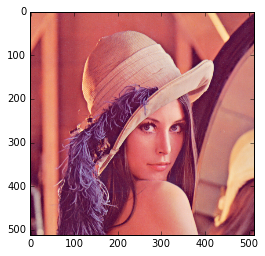

In [45]:
plt.imshow(lena);

In [46]:
io.imsave('lena.png', lena)

In [47]:
lena_s_diska = io.imread('lena.png')
thumbnail(lena_s_diska)

/projects/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


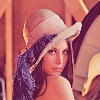

In [53]:
Image('thumb.png')

/projects/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


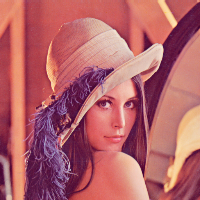

In [54]:
thumbnail(lena_s_diska, sirina=200, ime='thumb2.png')
Image('thumb2.png')

In [84]:
# Anonimne funkcije
f1 = lambda x: x**2

# Gdje anonimne funkcije mogu biti korisne?
map(lambda x: x**2, range(-3,4))
list(map(lambda x: x**2, range(-3,4)))

[9, 4, 1, 0, 1, 4, 9]

Funkcije su objekti kao i svi drugi.

In [104]:
def linearna (a,b):
    def rezultat (x):
        return a*x+b
    return rezultat
f=linearna(0.5,2)
f(1e3)

502.0

In [105]:
def kompozicija(f,g):
    return lambda x: f(g(x))
def g(x):
    return x**2
fg = kompozicija(f,g)
fg(1)

2.5

In [106]:
from operator import pow
pow(5,2)

25

In [108]:
def parcijalno(metoda, parametar):
    return lambda x: metoda(x,parametar)
h = parcijalno(pow,2)
h(20)

400

In [103]:
#kompozija proizvoljnog broja funkcija
from functools import reduce
def compose(*funcs): 
    return lambda x: reduce(lambda v, f: f(v), reversed(funcs), x)
ffgh = compose(f,f,g,h)
ffgh(1)

3.25

## Kontrola toka

In [61]:
izjava1 = False
izjava2 = False

if izjava1:
    print("izjava1 je True")
    
elif izjava2:
    print("izjava2 je True")
    
else:
    print("izjava1 i izjava2 su False")

izjava1 i izjava2 su False


In [62]:
izjava1 = izjava2 = True

if izjava1:
    if izjava2:
        print("i izjava1 i izjava2 su True")

i izjava1 i izjava2 su True


In [63]:
for x in range(4): #range počinje od 0
    print(x)

0
1
2
3


In [64]:
for word in ["Znanstvenici", "vole", "koristiti", "python"]:
    print(word)

Znanstvenici
vole
koristiti
python


In [65]:
for key, value in params.items():
    print(key + " = " + str(value))

parametar2 = 2.0
parametar3 = 3.0
parametar1 = 1.0


In [66]:
# kreiranje liste na elegantniji način pomoću for petlje
l1 = [x**2 for x in range(0,5)]

print(l1)

[0, 1, 4, 9, 16]


In [67]:
i = 0

while i < 5:
    print(i)
    
    i = i + 1
    
print("gotovo")

0
1
2
3
4
gotovo


## Klase

Smisao klasa (tj. objektnog programiranja) je da omogući grupiranje varijabli i pripadnih funkcija koje rade s njima.

In [48]:
class Point:
    """
    Jednostavna klasa koja služi za rad s točkama u Euklidskoj ravnini.
    """    
    def __init__(self, x, y):
        """
        Kreiranje točke s koordinatama x i y.
        """
        self.x = x
        self.y = y        
    def translate(self, dx, dy):
        """
        Translacija točke za dx u smjeru x-osi i dy u smjeru y-osi.
        """
        self.x += dx
        self.y += dy        
    def __str__(self):
        """
        Prikaz točke.
        """
        return("Point at [{:f}, {:f}]".format(self.x, self.y))

Funkcija oblika `__imeFunkcija__` obično implementira neku standardnu metodu za odgovarajući tip podataka.

+ `__init__`služi za kreiranje objekta dane klase
+ `__str__`služi za ispisivanje objekta
+ s matematičkog aspekta je važno da se mogu definirati i matematičke operacije nad objektima, kao npr. zbrajanje, množenje,...

In [49]:
# ako smo zaboravili definirati metodu pri kreiranju klase
def add(self, other):
    return Point(self.x + other.x,self.y + other.y)
Point.__add__ = add

In [50]:
p1 = Point(1,1)
p1.translate(2,3.5)
p2 = Point (2,3.5)

In [51]:
print(p1)
print(p2)
print(p1 + p2)

Point at [3.000000, 4.500000]
Point at [2.000000, 3.500000]
Point at [5.000000, 8.000000]


## Moduli

Moduli (ono što učitavamo s *import*) strukturom su ili datoteke (s nastavkom *.py*) koje na početku imaju *doc string* (komentar) koji opisuje modul.

Primjer modula uz korištenje IPython magije.

In [68]:
%%file mojmodul.py

# -*- coding: utf-8 -*-
"""
Primjer modula. Sadrži varijablu my_variable,
funkciju my_function te klasu MyClass.
"""
my_variable = 0
def my_function():
    """
    Primjer funkcije
    """
    return my_variable
class MyClass:
    """
    Primjer klase
    """
    def __init__(self):
        self.variable = my_variable        
    def set_variable(self, new_value):
        """
        Daje novu vrijednost varijabli self.variable
        """
        self.variable = new_value        
    def get_variable(self):
        return self.variable

Overwriting mojmodul.py


In [69]:
import mojmodul
help(mojmodul)

Help on module mojmodul:

NAME
    mojmodul

DESCRIPTION
    Primjer modula. Sadrži varijablu my_variable,
    funkciju my_function te klasu MyClass.

CLASSES
    builtins.object
        MyClass
    
    class MyClass(builtins.object)
     |  Primjer klase
     |  
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  get_variable(self)
     |  
     |  set_variable(self, new_value)
     |      Daje novu vrijednost varijabli self.variable
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    my_function()
        Primjer funkcije

DATA
    my_variable = 0

FILE
    /projects/95cb524c-f1ac-4a19-908e-5f47c10f47c1/01. Uvod; Python

## Paketi

To su kompleksniji moduli, koji su strukturirani kao dorektoriji, s datotekom *`__init__.py`*.

## Lovljenje grešaka

In [70]:
raise Exception("opis greške")

Exception: opis greške

In [71]:
try:
    # varijabla varijabla nije definirana
    print(varijabla)
except:
    print("Opa!")

Opa!


## Jupyter interactive
Jupyter notebook podržava i interaktivan rad. Dokumentaciju možete [ovdje](https://github.com/ipython/ipywidgets) pogledati. Za sada ćemo samo napraviti jedan primjer.

In [73]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import networkx as nx

In [74]:
def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n,m, k, p)
    nx.draw(g)
    plt.show()

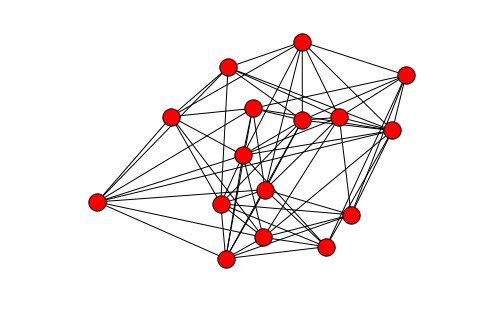

In [75]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
        generator={'lobster': random_lobster,
                   'power law': powerlaw_cluster,
                   'Newman-Watts-Strogatz': newman_watts_strogatz,
                   u'Erdős-Rényi': erdos_renyi,   });

In [14]:
from verzije import *
from IPython.display import HTML
HTML(print_sysinfo()+info_packages('matplotlib,IPython,scikit-image,networkx'))

Python verzija,3.5.0
kompajler,GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
sustav,Linux
broj CPU-a,8
interpreter,64bit
matplotlib verzija,1.5.1
IPython verzija,4.1.1
scikit-image verzija,0.11.3
networkx verzija,1.11


## Zadaci za vježbu
1. Generirajte listu neparnih brojeva od 1 do n.
2. Napišite funkciju koja rješava kvadratnu jednadžbu.
3. Napišite funkciju koja numerički računa integral funkcije koristeći trapeznu formulu 
$$ \int_a^b f(x)\approx \frac{h}{2}\sum_{i=1}^n (f(x_{i-1})+f(x_i)). $$
Funkcija treba ovako izgledati: 
```trapezint(f,a,b)```
4. Napišite funkciju za numeričko deriviranje oblika 
```diff(f,x,h=1e-6)```